#### <center>STROKE ANALYSIS USING CLASSIFICATION ALGORITHIM

##### A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.An ischemic stroke occurs when the blood supply to part of the brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.

##### Signs and symptoms of stroke include:
##### Trouble speaking and understanding what others are saying ,Paralysis or numbness of the face, arm or leg, Problems seeing in one or both eyes, Headache, Trouble walking.

#### Here we are need to find the person have stroke or not using the classification algorithm by using the stroke dataset




#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


#### Load DataSet     

here we are using the storke dataset from kaggle

In [2]:
df=pd.read_csv('stroke_data.csv')
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


#### The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


#### The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. std - The standard deviation.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,40907.0,0.555162,0.496954,0.00,0.00,1.00,1.00,1.00
age,40910.0,51.327255,21.623969,-9.00,35.00,52.00,68.00,103.00
hypertension,40910.0,0.213835,0.410017,0.00,0.00,0.00,0.00,1.00
heart_disease,40910.0,0.127719,0.333781,0.00,0.00,0.00,0.00,1.00
ever_married,40910.0,0.821340,0.383072,0.00,1.00,1.00,1.00,1.00
work_type,40910.0,3.461134,0.780919,0.00,3.00,4.00,4.00,4.00
Residence_type,40910.0,0.514886,0.499784,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,40910.0,122.075901,57.561531,55.12,78.75,97.92,167.59,271.74
bmi,40910.0,30.406355,6.835072,11.50,25.90,29.40,34.10,92.00
smoking_status,40910.0,0.488609,0.499876,0.00,0.00,0.00,1.00,1.00


#### Here we can see that the ever married and residence type columns have'nt any relationship with the stroke . so we can drop the two cloumns using drop()

In [5]:
df.drop(columns=['ever_married','Residence_type'],inplace=True)

##### Df. head(), Return the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [6]:
df.head()

,sex,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,4,228.69,36.6,1,1
1,1.0,42.0,0,1,4,105.92,32.5,0,1
2,0.0,61.0,0,0,4,171.23,34.4,1,1
3,1.0,41.0,1,0,3,174.12,24.0,0,1
4,1.0,85.0,0,0,4,186.21,29.0,1,1


##### Detect missing values. Return a boolean same-sized object indicating if the values are NA.

In [7]:
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.isnull().mean()*100

sex                  0.007333
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
work_type            0.000000
avg_glucose_level    0.000000
bmi                  0.000000
smoking_status       0.000000
stroke               0.000000
dtype: float64

### Univarient analysis

#### explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own. Descriptive statistics describe and summarize data.

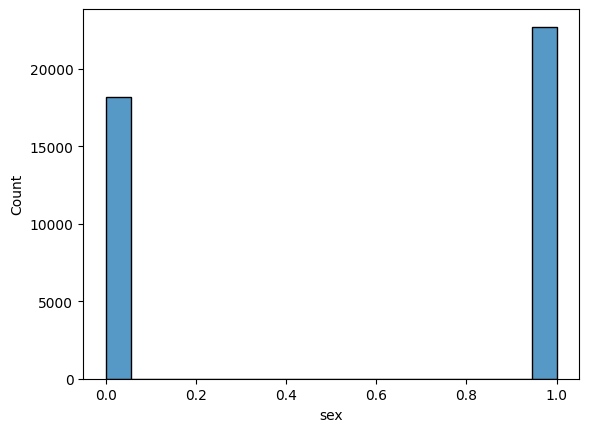

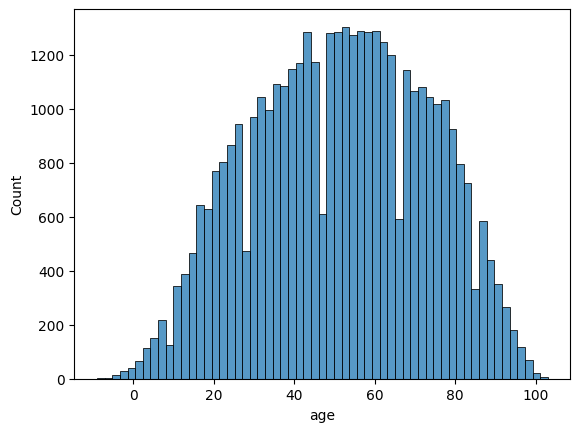

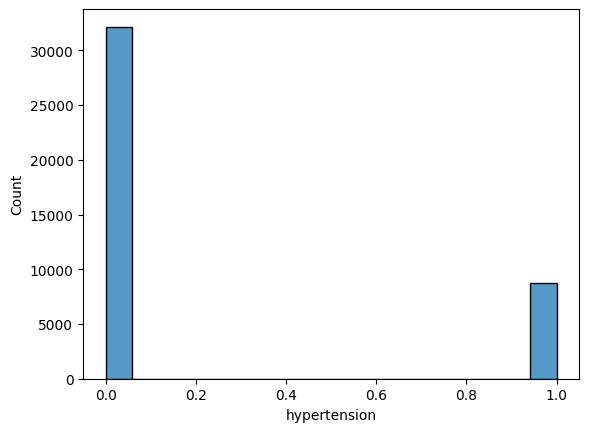

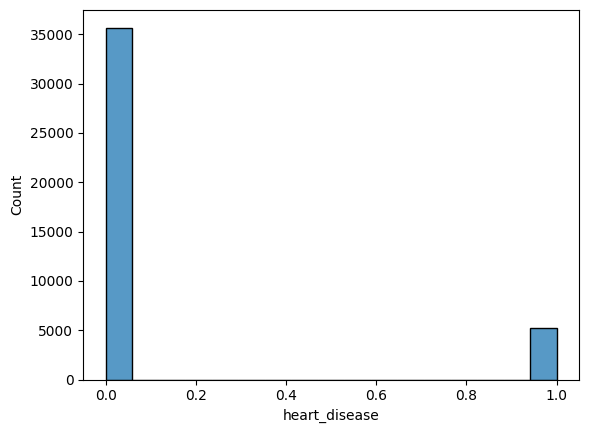

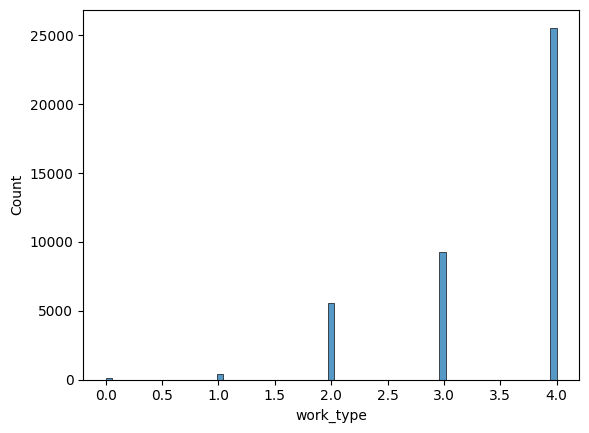

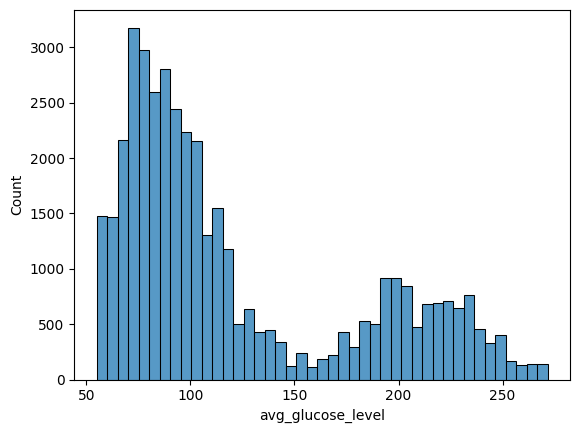

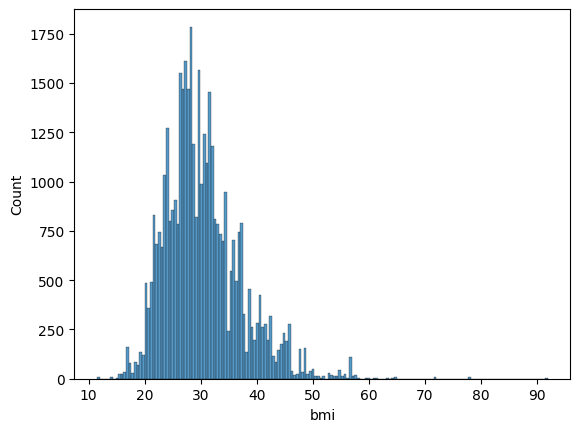

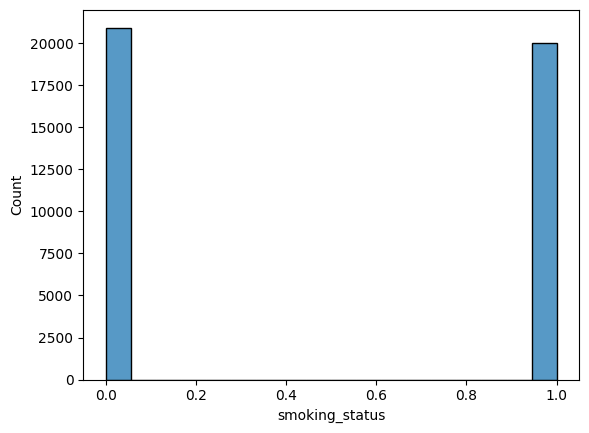

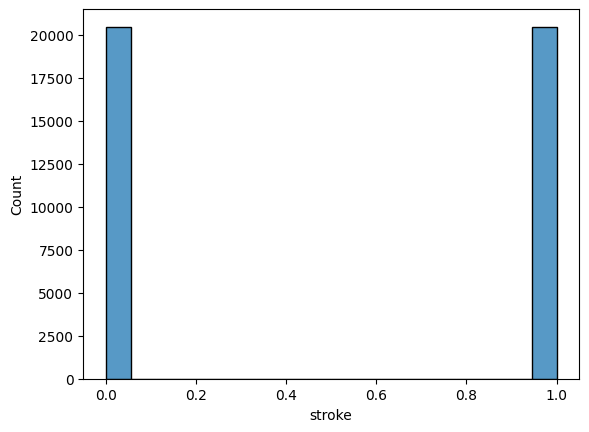

In [9]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.histplot(x=df[i])
        plt.show()

### KDE PLOT

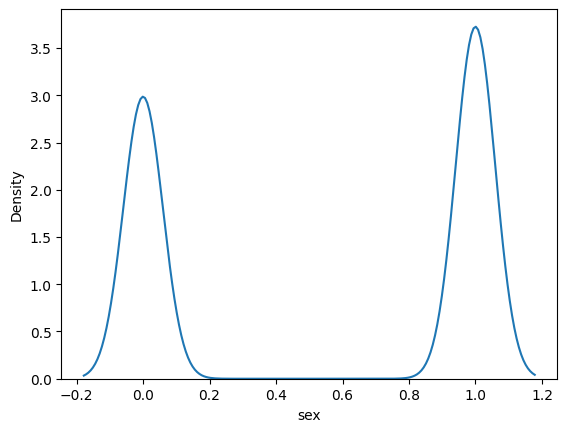

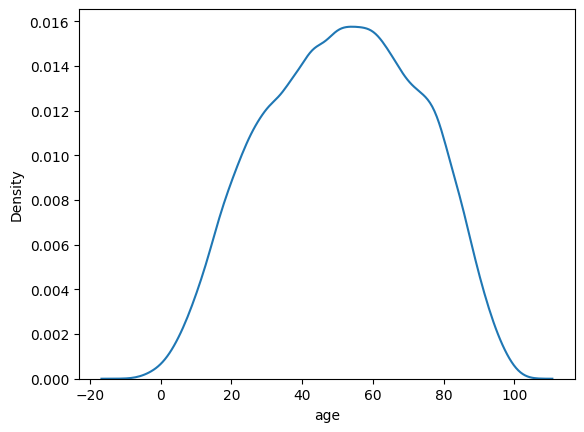

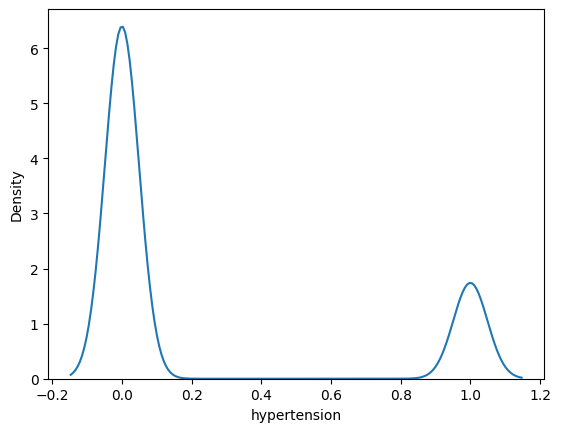

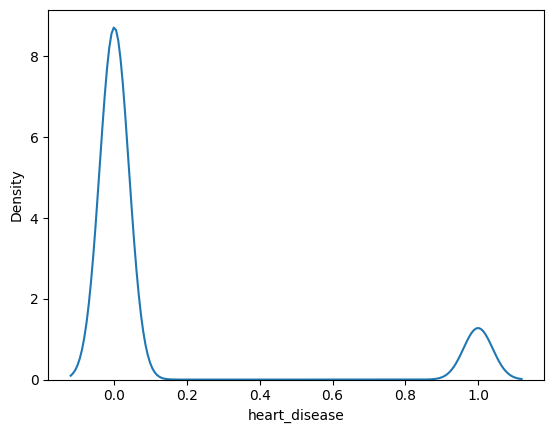

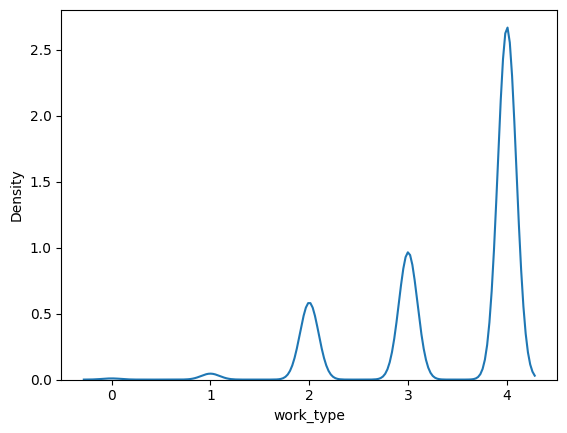

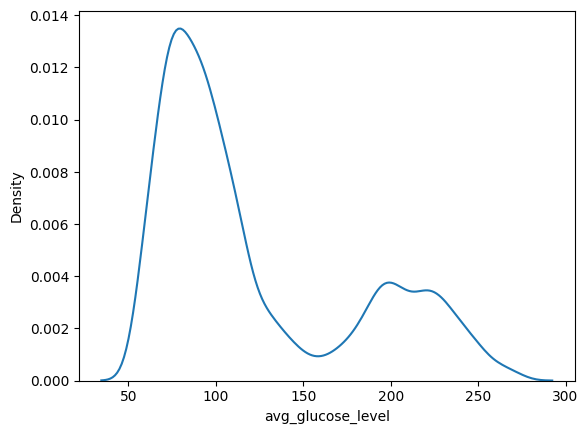

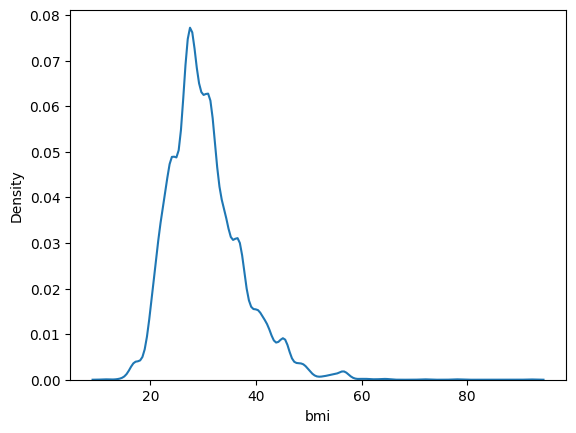

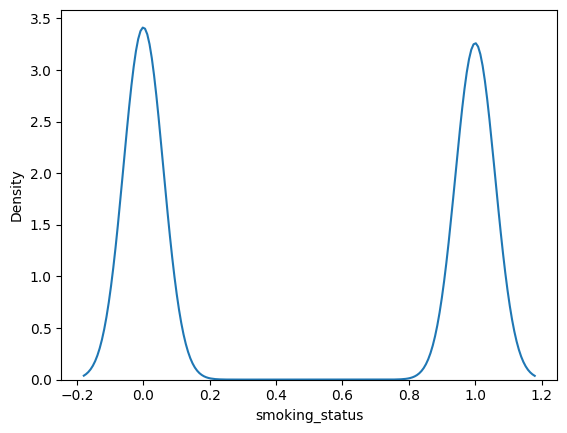

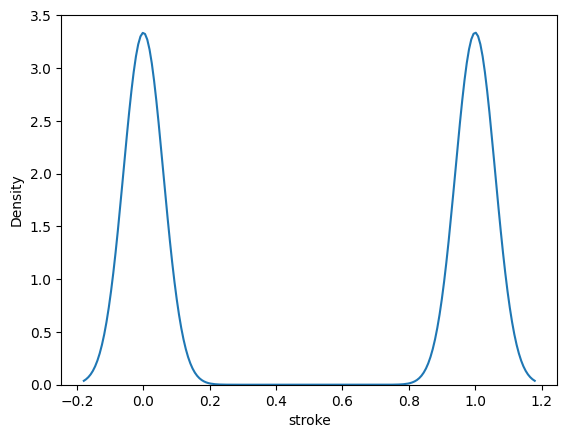

In [10]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.kdeplot(x=df[i])
        plt.show()

#### Box Plot

#### boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are.

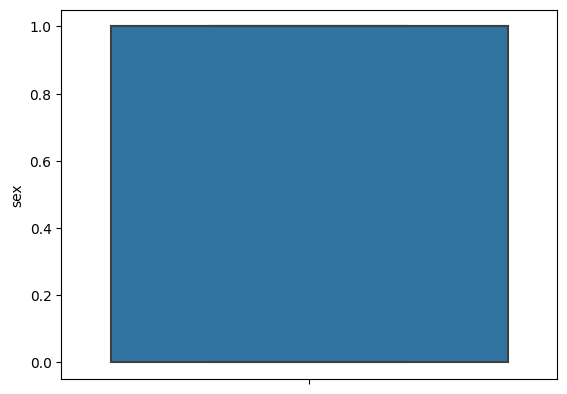

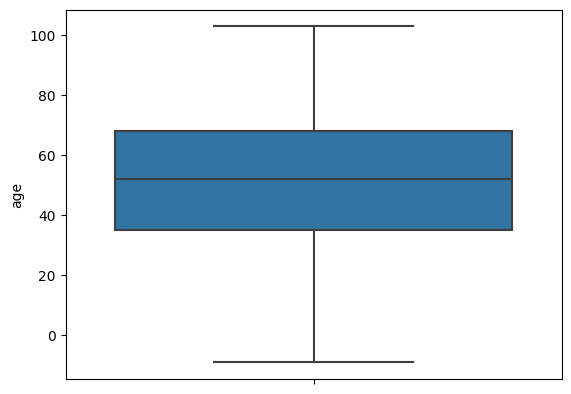

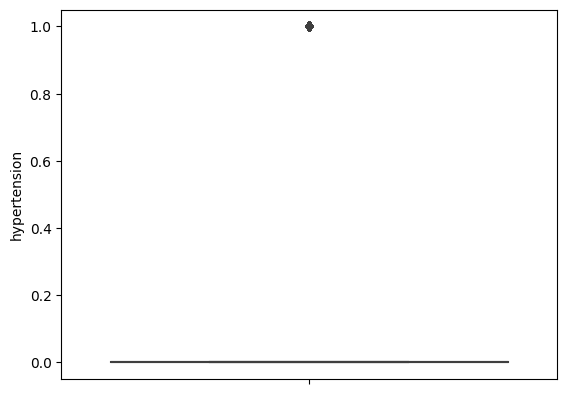

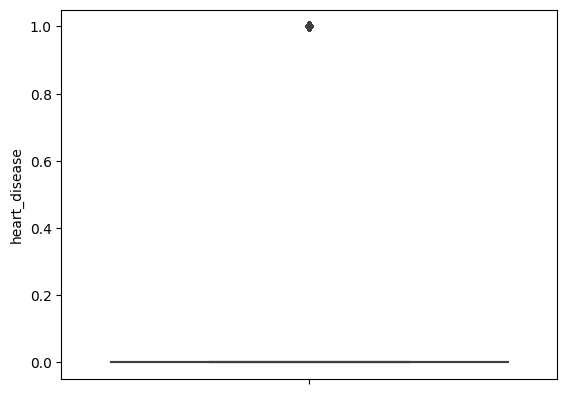

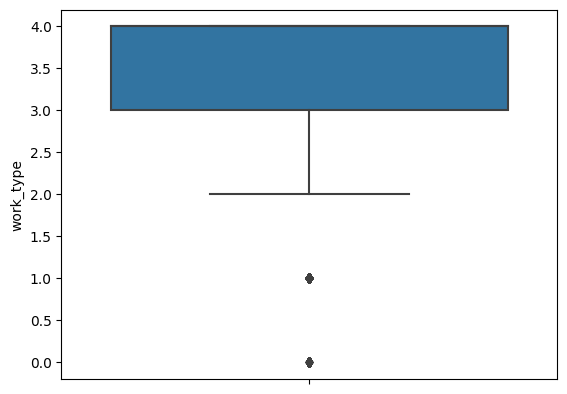

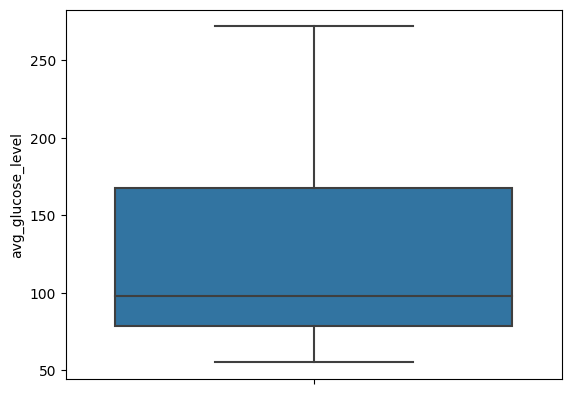

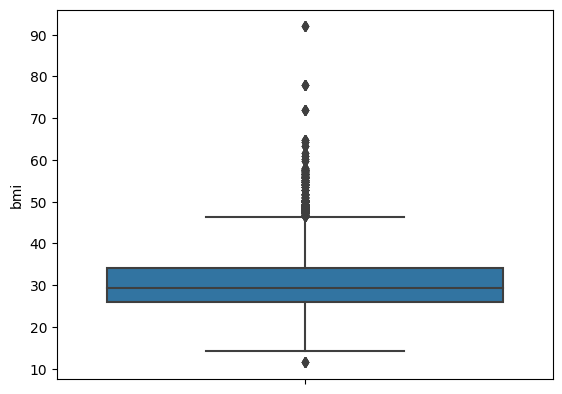

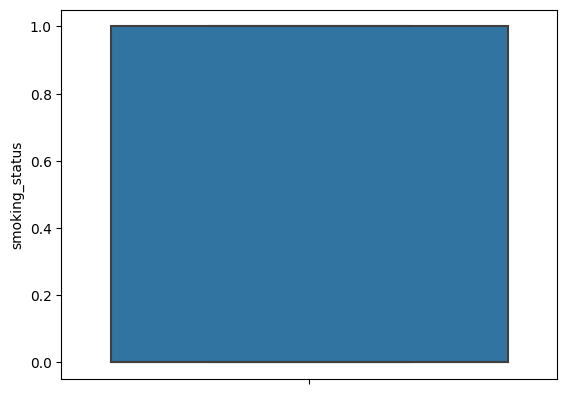

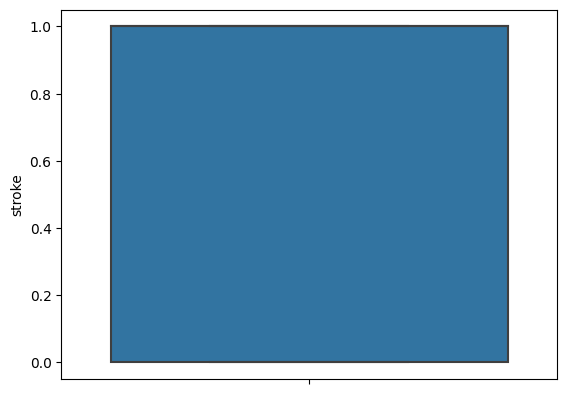

In [11]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.boxplot(y=df[i])
        plt.show()

#### from the above box plot representaion we can find that there are some outliers are present . so we need to treat the outliers using three sigma rule

In [12]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [13]:
for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

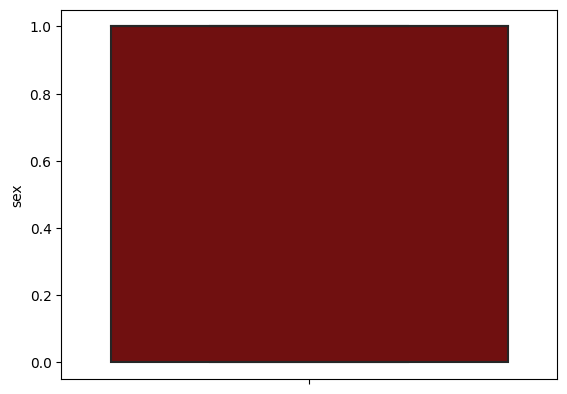

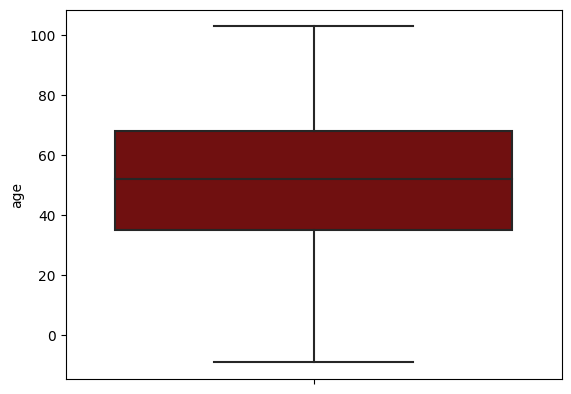

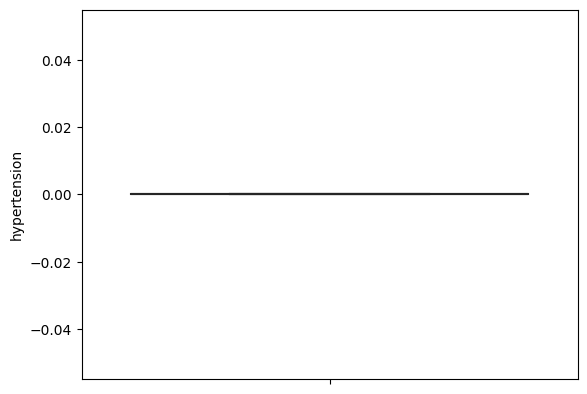

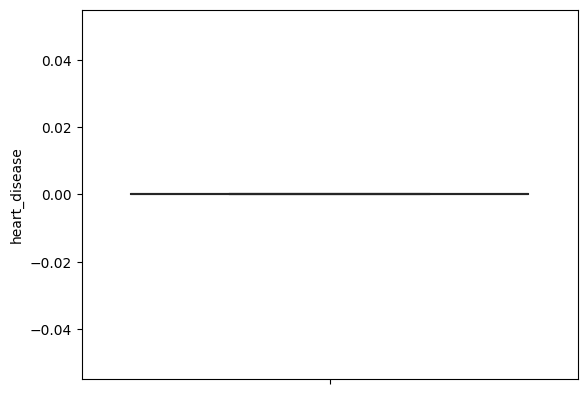

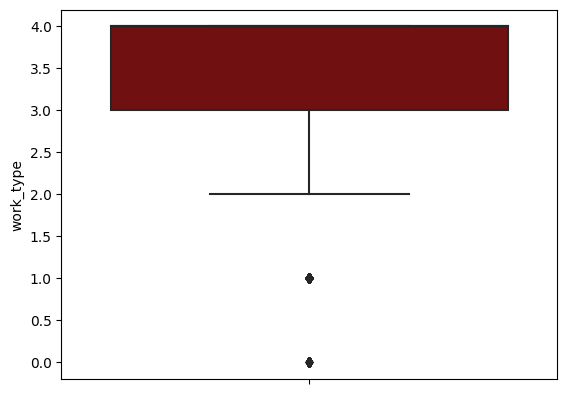

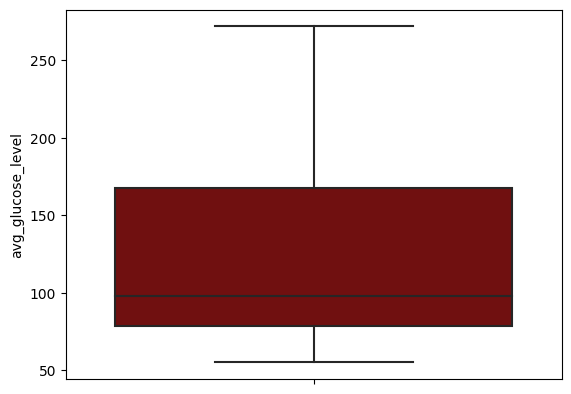

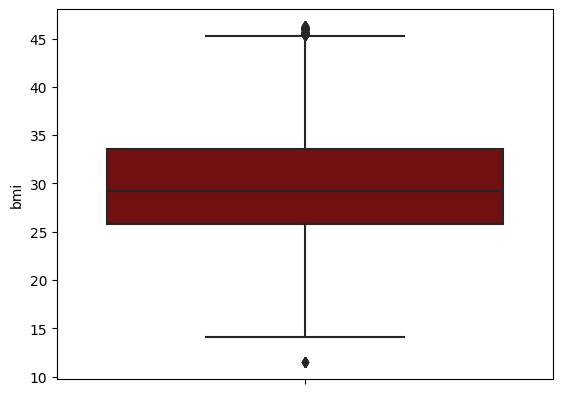

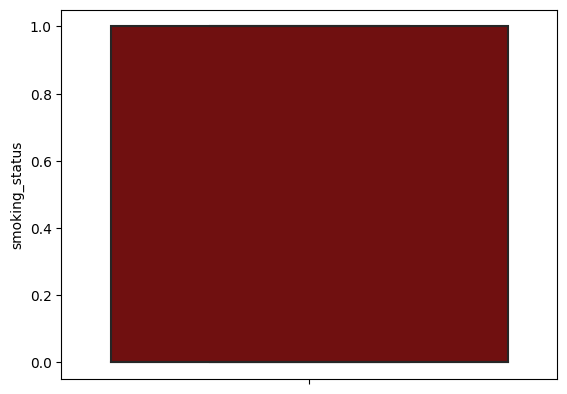

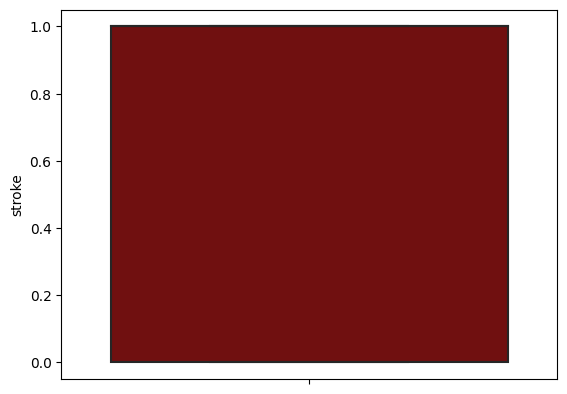

In [14]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column], color="maroon")
        plt.show()

In [15]:
df.isnull().sum()

sex                     3
age                     0
hypertension         8748
heart_disease        5225
work_type               0
avg_glucose_level       0
bmi                   915
smoking_status          0
stroke                  0
dtype: int64

##### after treating the outliers some nan values are occured in the datframe. so we need to drop the nan values using dropna()

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
df.stroke.value_counts()

0.0    16956
1.0    10862
Name: stroke, dtype: int64

#### BarPlot

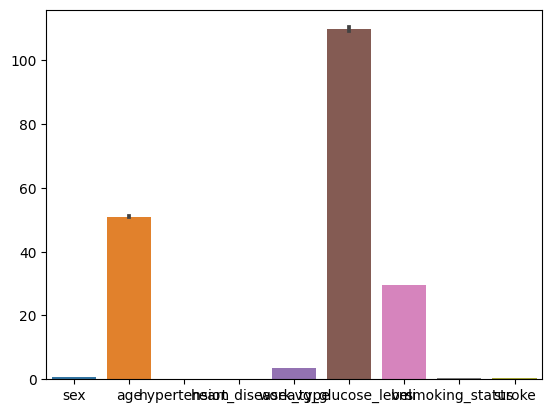

In [19]:
sns.barplot(data=df);

### PIE PLOT

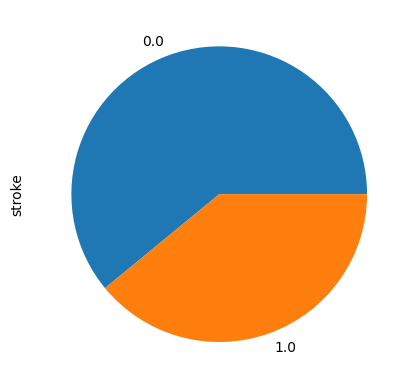

In [20]:
df.stroke.value_counts().plot.pie();

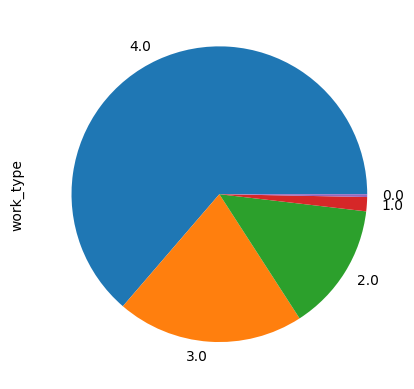

In [21]:
df.work_type.value_counts().plot.pie();

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27818 entries, 2 to 40909
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                27818 non-null  float64
 1   age                27818 non-null  float64
 2   hypertension       27818 non-null  float64
 3   heart_disease      27818 non-null  float64
 4   work_type          27818 non-null  float64
 5   avg_glucose_level  27818 non-null  float64
 6   bmi                27818 non-null  float64
 7   smoking_status     27818 non-null  float64
 8   stroke             27818 non-null  float64
dtypes: float64(9)
memory usage: 2.1 MB


### import k library from sklearn for correlation 

In [23]:
import klib as k

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

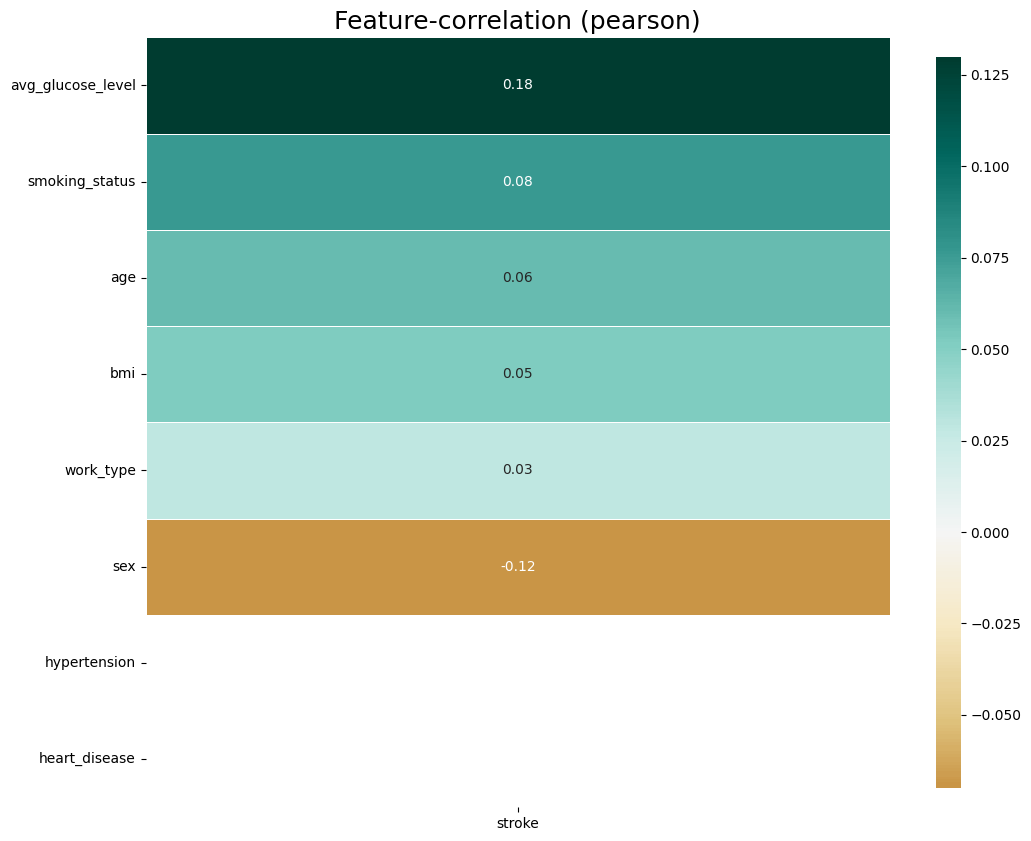

In [24]:
k.corr_plot(data=df,target='stroke')

#### Heat map for finding the correlation of features with a target column "Stroke"

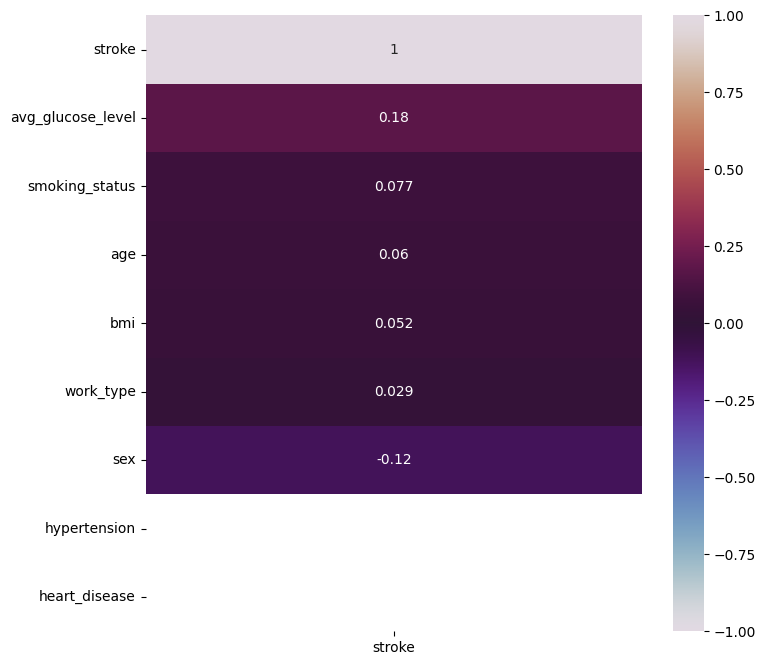

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr()[["stroke"]].sort_values(by="stroke", ascending=False), vmin=-1, vmax=1,annot=True, cmap="twilight");

#### we are selecting the columns that are highly correlated with the target column

In [26]:
x=df[['avg_glucose_level','smoking_status']].values
y=df[['stroke']].values

### Cross validation

In [27]:
models={
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

In [28]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, cv=10, n_jobs=-1)
    print("cross validation model : {}".format(name))
    Average_score = np.mean(scores)
     print("Average score: ", Average_score)
    print("*"*100)

cross validation model : DecisionTreeClassifier
Average score:  0.9972679585282798
****************************************************************************************************
cross validation model : SVC
Average score:  0.642821073780152
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Average score:  0.8584730626922805
****************************************************************************************************
cross validation model : LogisticRegression
Average score:  0.6405563608040696
****************************************************************************************************
cross validation model : AdaBoostClassifier
Average score:  0.6958801392110529
****************************************************************************************************
cross validation model : RandomForestClassifier
Average score:  0.9972679585282798
*********************

##### from the cross validation method we can find that the Random Classifier has the highest accuracy .so we select the random forest classifier for the classification.

###  RandomForestClassifier

##### Splitting the data set into training and testing

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
model=RandomForestClassifier()

#### Model Accuracy

In [31]:
model.fit(x_train,y_train)
print("model traines with {}".format(model))
training_score = model.score(x_train, y_train)*100
testing_score = model.score(x_test, y_test)*100
print("training_score: ", training_score)
print("testing_score: ", testing_score)

model traines with RandomForestClassifier()
training_score:  99.72139840028758
testing_score:  99.74838245866283


In [32]:
y_predict=model.predict(x)

In [33]:
output=pd.DataFrame(zip(y,y_predict),columns=("ACTUAL","PREDICTED"),dtype=float)
output.head()

,ACTUAL,PREDICTED
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


#### AUC ROC stands for “Area Under the Curve” of the “Receiver Operating Characteristic” curve. The AUC ROC curve is basically a way of measuring the performance of an ML model. AUC measures the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.

Model used is::  RandomForestClassifier()


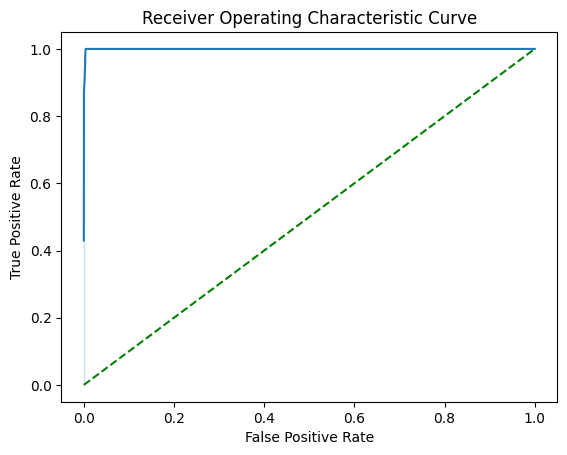

In [34]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()